<a href="https://colab.research.google.com/github/nandhakishornair/transportation-data-analysis-python/blob/main/DAY_29_%E2%80%94_Random_Forest_Congestion_Prediction_(More_Powerful_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#RANDOM FOREST CONGESTION
#this model works better than logic regression model and

In [3]:
import pandas as pd
import numpy as np

# Create a simulated transportation dataset
df = pd.DataFrame({
    'timestamp': pd.date_range(start='2023-01-01 06:00', periods=120, freq='5min'),
    'flow': np.random.randint(100, 900, 120),
    'speed': np.random.normal(60, 12, 120).clip(10, 120)
})

# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Feature engineering
df['density'] = df['flow'] / df['speed']
df['speed_roll_3'] = df['speed'].rolling(window=3).mean()
df['flow_roll_3'] = df['flow'].rolling(window=3).mean()

# Congestion label
df['congested'] = df['speed'] < 40

df.head()

,timestamp,flow,speed,hour,minute,day_of_week,density,speed_roll_3,flow_roll_3,congested
0,2023-01-01 06:00:00,318,45.693996,6,0,6,6.959339,NaN,NaN,False
1,2023-01-01 06:05:00,729,90.891407,6,5,6,8.020560,NaN,NaN,False
2,2023-01-01 06:10:00,753,62.154942,6,10,6,12.114885,66.246782,600.000000,False
3,2023-01-01 06:15:00,325,68.654483,6,15,6,4.733850,73.900278,602.333333,False
4,2023-01-01 06:20:00,584,74.219120,6,20,6,7.868592,68.342848,554.000000,False


In [4]:
df.to_csv("day27_engineered_transport_data.csv", index=False)



In [5]:
import pandas as pd

# If not already:
# df = pd.read_csv("day27_engineered_transport_data.csv")

features = ['speed', 'flow', 'density', 'hour', 'speed_roll_3']

# Drop rows where any of these features are NaN
df_clean = df.dropna(subset=features)

X = df_clean[features]
y = df_clean['congested'].astype(int)  # True/False → 1/0

X.head(), y.head()


(       speed  flow    density  hour  speed_roll_3
 2  62.154942   753  12.114885     6     66.246782
 3  68.654483   325   4.733850     6     73.900278
 4  74.219120   584   7.868592     6     68.342848
 5  67.873077   197   2.902476     6     70.248893
 6  68.716707   324   4.715011     6     70.269635,
 2    0
 3    0
 4    0
 5    0
 6    0
 Name: congested, dtype: int64)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((94, 5), (24, 5))

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,  # number of trees
    max_depth=8,       # limit tree depth to avoid overfitting
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print("Classification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Confusion matrix:
[[24]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [10]:
import pandas as pd

importance = pd.DataFrame({
    'feature': features,
    'importance': rf.feature_importances_
})

importance.sort_values(by='importance', ascending=False)


,feature,importance
0,speed,0.581291
2,density,0.174480
4,speed_roll_3,0.167351
1,flow,0.050173
3,hour,0.026705


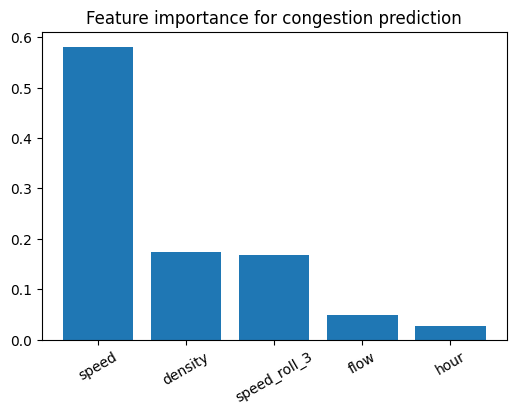

In [11]:
import matplotlib.pyplot as plt

importance_sorted = importance.sort_values(by='importance', ascending=False)

plt.figure(figsize=(6,4))
plt.bar(importance_sorted['feature'], importance_sorted['importance'])
plt.title("Feature importance for congestion prediction")
plt.xticks(rotation=30)
plt.show()
